<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Limpieza de datos</h1>
  <p></p>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mlxtend.preprocessing import standardize
from scipy import stats

# Declaración de variables

In [2]:
organismo ="archaea"
dataset = 1
nombre = ("ds" + str(dataset) + "_" + str(organismo))
nombre2 = (str(organismo)+ " dataset " + str(dataset))
r2 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_filtrar")
r3 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_atipicos")

nom1 = ("/ds" + str(dataset) + "_AAC_efectores_" + str(organismo) + ".txt")
nom2 = ("/ds" + str(dataset) + "_ACC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom3 = ("/ds" + str(dataset) + "_ACC_mass_efectores_" + str(organismo) + ".txt")
nom4 = ("/ds" + str(dataset) + "_ACC_hidro_efectores_" + str(organismo) + ".txt")
nom5 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom6 = ("/ds" + str(dataset) + "_PseAAC_mass_efectores_" + str(organismo) + ".txt")
nom7 = ("/ds" + str(dataset) + "_PseAAC_hidro_efectores_" + str(organismo) + ".txt")

nom8 = ("/ds" + str(dataset) + "_AAC_no_efectores_" + str(organismo) + ".txt")
nom9 = ("/ds" + str(dataset) + "_ACC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom10 = ("/ds" + str(dataset) + "_ACC_mass_no_efectores_" + str(organismo) + ".txt")
nom11 = ("/ds" + str(dataset) + "_ACC_hidro_no_efectores_" + str(organismo) + ".txt")
nom12 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom13 = ("/ds" + str(dataset) + "_PseAAC_mass_no_efectores_" + str(organismo) + ".txt")
nom14 = ("/ds" + str(dataset) + "_PseAAC_hidro_no_efectores_" + str(organismo) + ".txt")

#Efectores
AAC_efec= pd.read_csv(str(r2) + str(nom1), header=None,prefix='X',sep=',')
ACC_hidro_mass_efec = pd.read_csv(str(r2) + str(nom2), header=None,prefix='X',sep=',')
ACC_mass_efec = pd.read_csv(str(r2) + str(nom3), header=None,prefix='X',sep=',')
ACC_hidro_efec = pd.read_csv(str(r2) + str(nom4), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_efec = pd.read_csv(str(r2) +str(nom5), header=None,prefix='X',sep=',')
PseAAC_mass_efec = pd.read_csv(str(r2) + str(nom6), header=None,prefix='X',sep=',')
PseAAC_hidro_efec = pd.read_csv(str(r2) + str(nom7), header=None,prefix='X',sep=',')

#No efectores
AAC_no_efec= pd.read_csv(str(r2) + str(nom8), header=None,prefix='X',sep=',')
ACC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom9), header=None,prefix='X',sep=',')
ACC_mass_no_efec =pd.read_csv(str(r2) + str(nom10), header=None,prefix='X',sep=',')
ACC_hidro_no_efec =pd.read_csv(str(r2) + str(nom11), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom12), header=None,prefix='X',sep=',')
PseAAC_mass_no_efec =pd.read_csv(str(r2) + str(nom13), header=None,prefix='X',sep=',')
PseAAC_hidro_no_efec =pd.read_csv(str(r2) + str(nom14), header=None,prefix='X',sep=',')

# Composición de aminoácidos (AAC)

efectores
Composición de aminoácidos (AAC) efectores archaea dataset 1, con valores atípicos.
Valores del documento csv.

         X0     X1     X2     X3     X4      X5     X6      X7     X8     X9  \
0    11.081  7.027  3.243  4.865  0.270   8.919  6.216   9.459  2.162  6.216   
1    14.614  5.819  7.037  7.037  0.271   6.225  2.436  19.215  0.677  1.759   
2    15.709  4.981  1.149  1.149  0.000   3.831  1.149   8.812  1.149  4.981   
3     8.922  5.948  1.859  5.948  1.115   7.807  3.717   9.665  0.743  5.948   
4    10.405  7.514  2.312  2.312  0.578  15.029  1.734   8.092  1.734  6.936   
..      ...    ...    ...    ...    ...     ...    ...     ...    ...    ...   
495   7.216  7.216  4.124  4.124  0.000   5.155  3.093   5.155  2.062  8.247   
496   6.637  6.195  5.310  5.752  0.885   7.522  0.442   3.982  0.885  8.850   
497  17.598  3.073  1.117  4.749  0.000   1.955  1.676  12.011  0.838  3.631   
498   6.047  6.047  2.791  6.047  0.000   3.721  1.860   9.302  4.186  4.186  

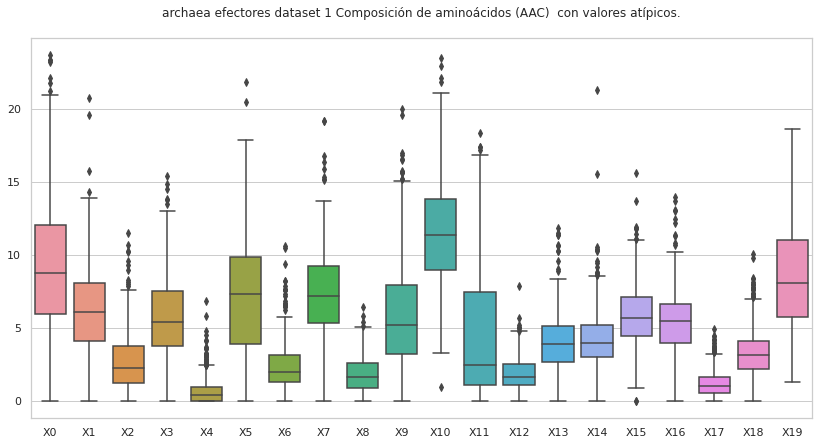

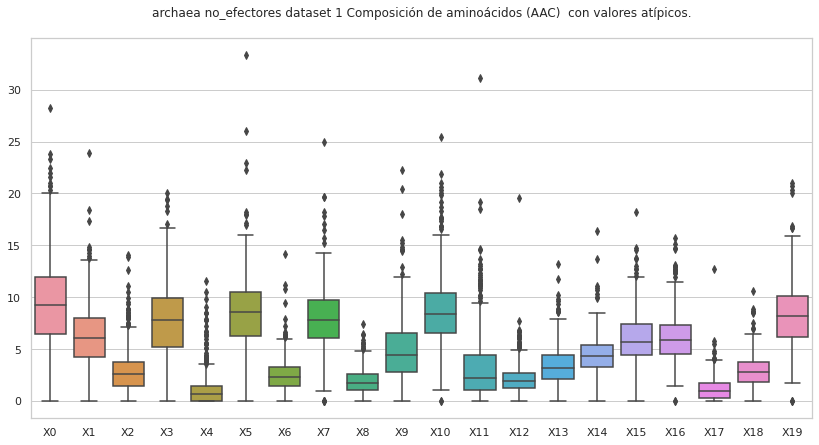

In [3]:
transf = "Composición de aminoácidos (AAC) "
etiq="efectores "
estado = "con valores atípicos.\n"
df=""

for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec    
    
    #del df['X20']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf)+" "+str(estado))

## Composición de aminoácidos (AAC), sin valores atípicos

efectores
Composición de aminoácidos (AAC) efectores archaea dataset 1, sin valores atípicos.
Valores del documento csv.

         X0     X1     X2     X3     X4      X5     X6      X7     X8     X9  \
0    11.081  7.027  3.243  4.865  0.270   8.919  6.216   9.459  2.162  6.216   
2    15.709  4.981  1.149  1.149  0.000   3.831  1.149   8.812  1.149  4.981   
3     8.922  5.948  1.859  5.948  1.115   7.807  3.717   9.665  0.743  5.948   
4    10.405  7.514  2.312  2.312  0.578  15.029  1.734   8.092  1.734  6.936   
5    18.465  2.878  1.199  2.638  0.000   1.918  1.439  12.710  0.719  4.317   
..      ...    ...    ...    ...    ...     ...    ...     ...    ...    ...   
492  11.083  7.053  2.519  5.793  0.000   8.816  3.023   8.060  0.504  5.793   
495   7.216  7.216  4.124  4.124  0.000   5.155  3.093   5.155  2.062  8.247   
496   6.637  6.195  5.310  5.752  0.885   7.522  0.442   3.982  0.885  8.850   
497  17.598  3.073  1.117  4.749  0.000   1.955  1.676  12.011  0.838  3.631  

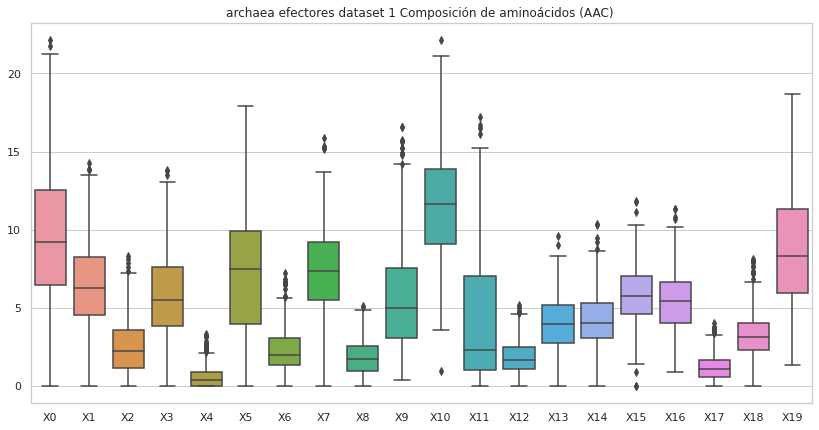

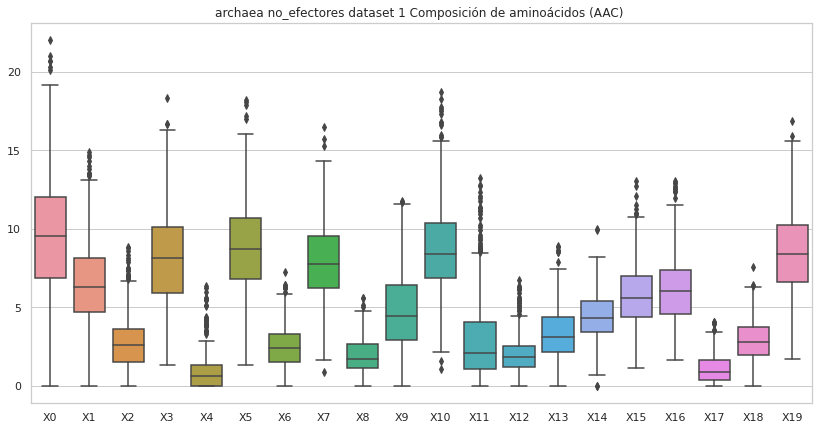

In [4]:
transf = "Composición de aminoácidos (AAC) "
estado = "sin valores atípicos.\n"
transf2="AAC"

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec   
    
    del df['X20']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])

    df['X20'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf))

# Composición de pseudo aminoácidos (PseAAC) hidro_mass

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores archaea dataset 1, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.037370  0.000911  0.016407  0.030079  0.007292  0.031902  0.007292   
1    0.021043  0.000390  0.010132  0.008963  0.004287  0.027668  0.000974   
2    0.026860  0.000000  0.001965  0.006551  0.006551  0.015068  0.001965   
3    0.036558  0.004570  0.024372  0.031988  0.012186  0.039605  0.003047   
4    0.052606  0.002923  0.011690  0.075987  0.017535  0.040916  0.008768   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.043471  0.000000  0.024841  0.031051  0.031051  0.031051  0.012420   
496  0.088867  0.011849  0.077018  0.100716  0.035547  0.053320  0.011849   
497  0.022576  0.000000  0.006092  0.002508  0.005734  0.015409  0.001075   
498  0.019667  0.000000  0.019667  0.012103  0.016642  0.030258  0.013616   
499  0.05

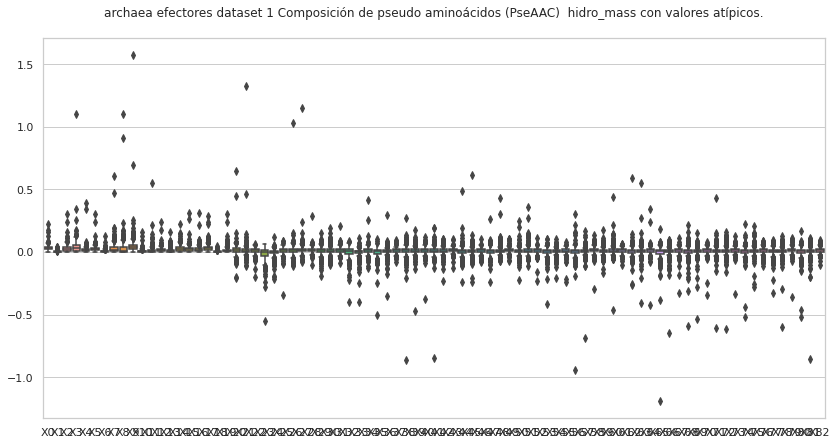

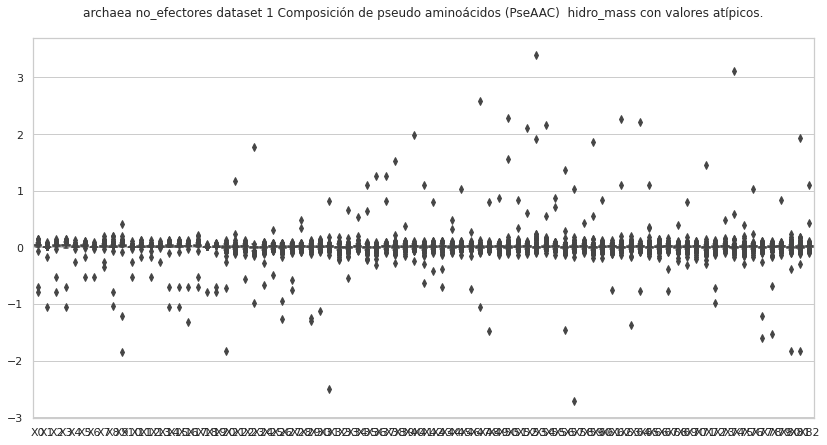

In [5]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    #del df['X83']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro_mass, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores archaea dataset 1, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.037370  0.000911  0.016407  0.030079  0.007292  0.031902  0.007292   
1    0.021043  0.000390  0.010132  0.008963  0.004287  0.027668  0.000974   
2    0.026860  0.000000  0.001965  0.006551  0.006551  0.015068  0.001965   
3    0.036558  0.004570  0.024372  0.031988  0.012186  0.039605  0.003047   
4    0.052606  0.002923  0.011690  0.075987  0.017535  0.040916  0.008768   
..        ...       ...       ...       ...       ...       ...       ...   
493  0.006949  0.011582  0.016214  0.046327  0.002316  0.020847  0.009265   
495  0.043471  0.000000  0.024841  0.031051  0.031051  0.031051  0.012420   
497  0.022576  0.000000  0.006092  0.002508  0.005734  0.015409  0.001075   
498  0.019667  0.000000  0.019667  0.012103  0.016642  0.030258  0.013616   
499  0.05

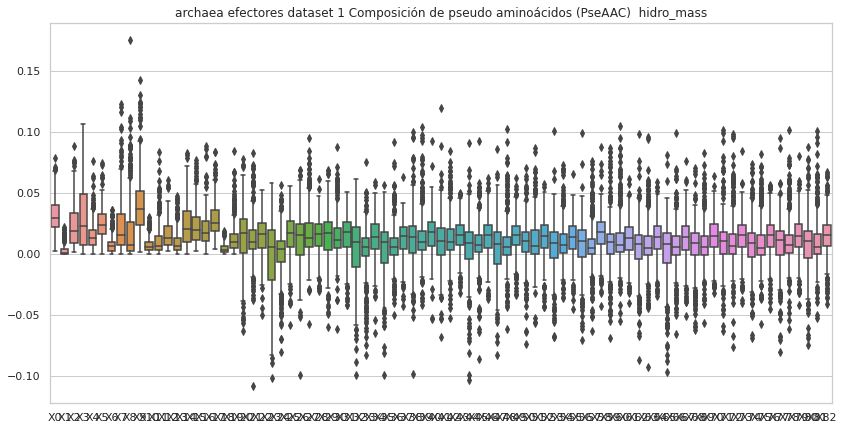

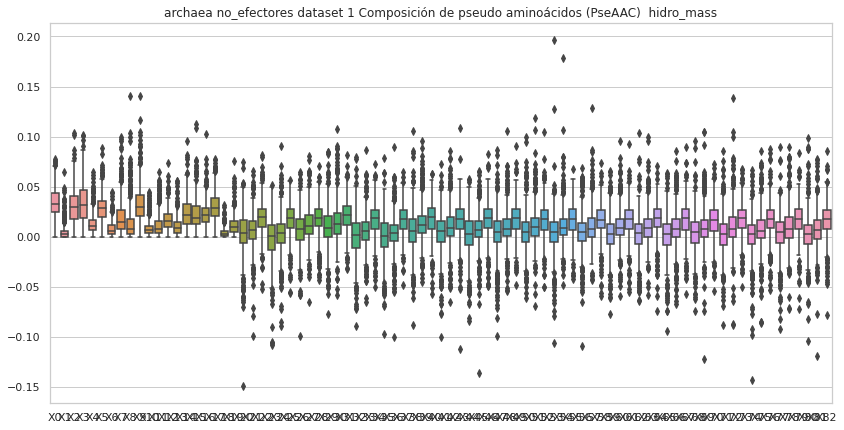

In [6]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    del df['X83']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X83'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) mass

efectores
Composición de pseudo aminoácidos (PseAAC)  mass efectores archaea dataset 1, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.046768  0.001141  0.020532  0.037642  0.009125  0.039924  0.009125   
1    0.023286  0.000431  0.011212  0.009918  0.004743  0.030617  0.001078   
2    0.048880  0.000000  0.003577  0.011922  0.011922  0.027420  0.003577   
3    0.039226  0.004903  0.026151  0.034323  0.013075  0.042495  0.003269   
4    0.077794  0.004322  0.017288  0.112369  0.025931  0.060506  0.012966   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.046413  0.000000  0.026521  0.033152  0.033152  0.033152  0.013261   
496  0.071706  0.009561  0.062145  0.081267  0.028682  0.043024  0.009561   
497  0.036567  0.000000  0.009867  0.004063  0.009287  0.024959  0.001741   
498  0.039109  0.000000  0.039109  0.024067  0.033092  0.060168  0.027075   
499  0.059125  

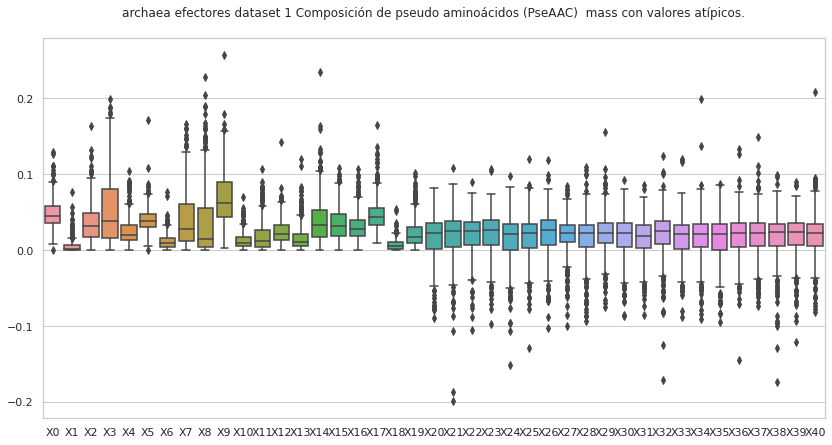

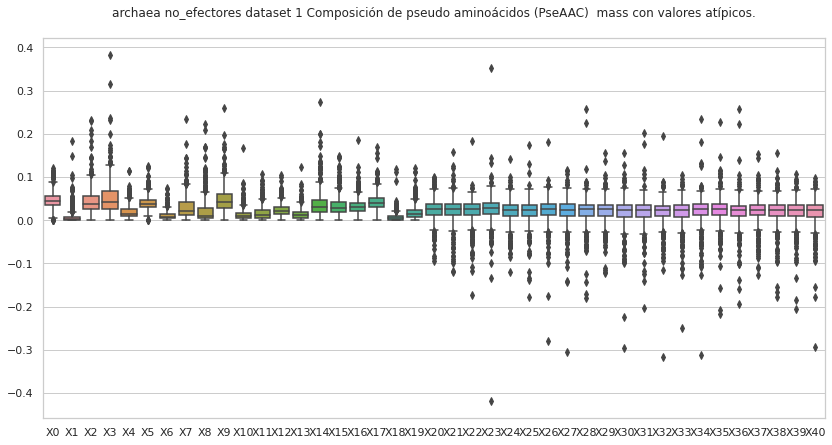

In [7]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    #del df['X41']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) mass, sin valores atípicos

Composición de pseudo aminoácidos (PseAAC)  mass efectores archaea dataset 1, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.046768  0.001141  0.020532  0.037642  0.009125  0.039924  0.009125   
1    0.023286  0.000431  0.011212  0.009918  0.004743  0.030617  0.001078   
2    0.048880  0.000000  0.003577  0.011922  0.011922  0.027420  0.003577   
3    0.039226  0.004903  0.026151  0.034323  0.013075  0.042495  0.003269   
4    0.077794  0.004322  0.017288  0.112369  0.025931  0.060506  0.012966   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.046413  0.000000  0.026521  0.033152  0.033152  0.033152  0.013261   
496  0.071706  0.009561  0.062145  0.081267  0.028682  0.043024  0.009561   
497  0.036567  0.000000  0.009867  0.004063  0.009287  0.024959  0.001741   
498  0.039109  0.000000  0.039109  0.024067  0.033092  0.060168  0.027075   
499  0.059125  0.000000  

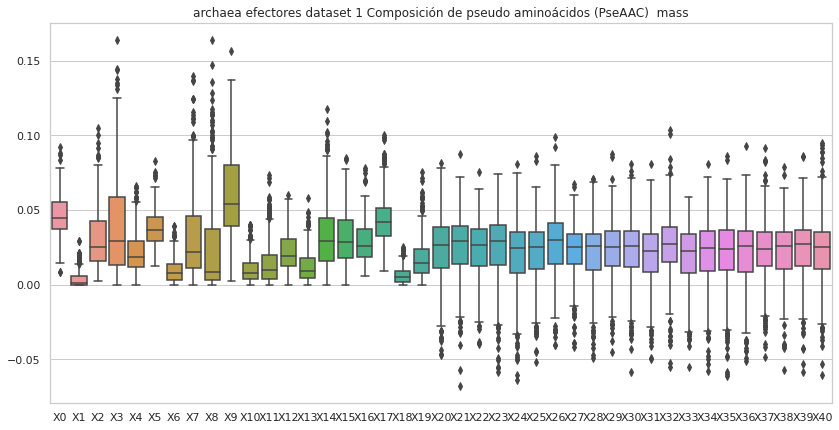

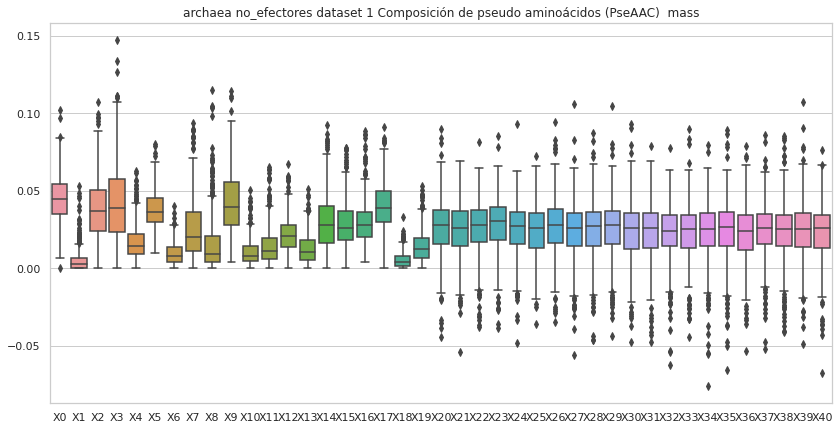

In [8]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    del df['X41']
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X41'] = etiq
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) hidro

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro efectores archaea dataset 1, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.069438  0.001694  0.030485  0.055889  0.013549  0.059277  0.013549   
1    0.087569  0.001622  0.042163  0.037298  0.017838  0.115137  0.004054   
2    0.043220  0.000000  0.003162  0.010541  0.010541  0.024245  0.003162   
3    0.076519  0.009565  0.051013  0.066954  0.025506  0.082896  0.006377   
4    0.063428  0.003524  0.014095  0.091619  0.021143  0.049333  0.010571   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.065296  0.000000  0.037312  0.046640  0.046640  0.046640  0.018656   
496  0.080817  0.010776  0.070042  0.091593  0.032327  0.048490  0.010776   
497  0.044187  0.000000  0.011924  0.004910  0.011222  0.030160  0.002104   
498  0.023915  0.000000  0.023915  0.014717  0.020236  0.036793  0.016557   
499  0.080488 

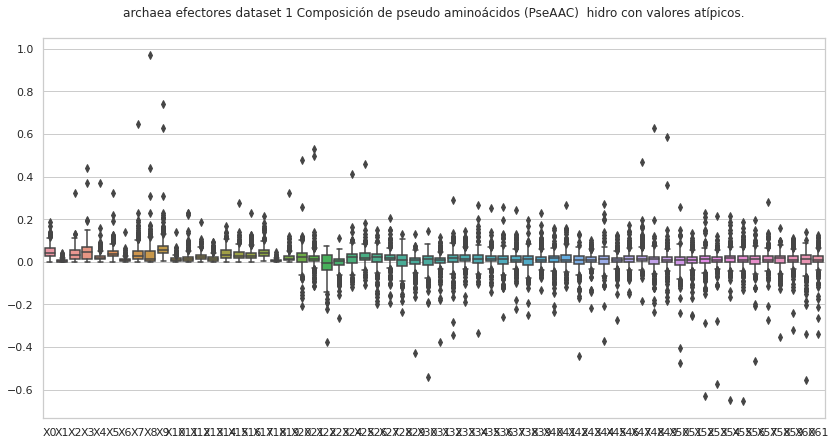

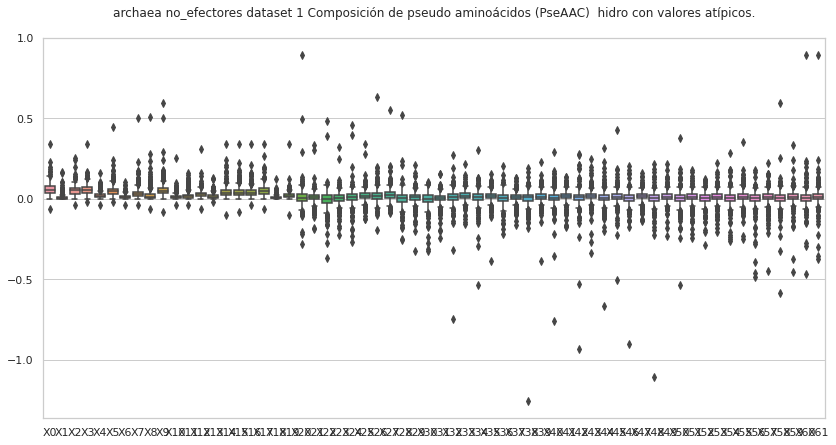

In [9]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    #del df['X62']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  efectores archaea dataset 1, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.069438  0.001694  0.030485  0.055889  0.013549  0.059277  0.013549   
1    0.087569  0.001622  0.042163  0.037298  0.017838  0.115137  0.004054   
2    0.043220  0.000000  0.003162  0.010541  0.010541  0.024245  0.003162   
3    0.076519  0.009565  0.051013  0.066954  0.025506  0.082896  0.006377   
4    0.063428  0.003524  0.014095  0.091619  0.021143  0.049333  0.010571   
..        ...       ...       ...       ...       ...       ...       ...   
491  0.024908  0.000000  0.007866  0.005244  0.009177  0.022286  0.009177   
492  0.021760  0.000000  0.011375  0.017309  0.011375  0.015826  0.000989   
493  0.007446  0.012410  0.017374  0.049640  0.002482  0.022338  0.009928   
497  0.044187  0.000000  0.011924  0.004910  0.011222  0.030160  0.002104   
498  0.023915  0.000

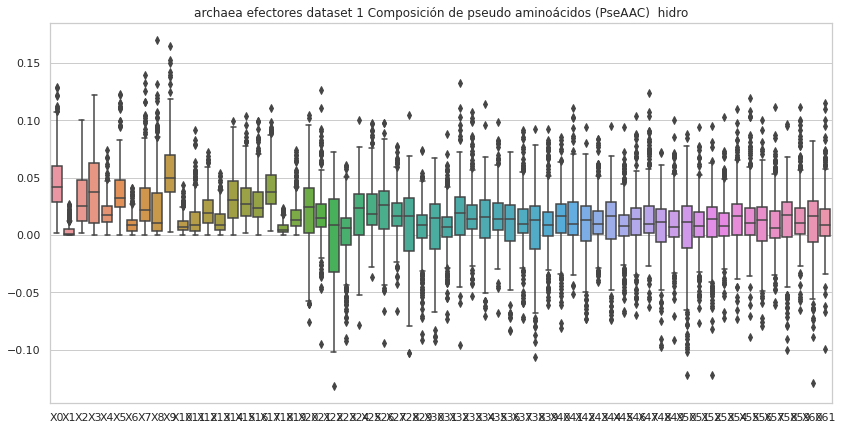

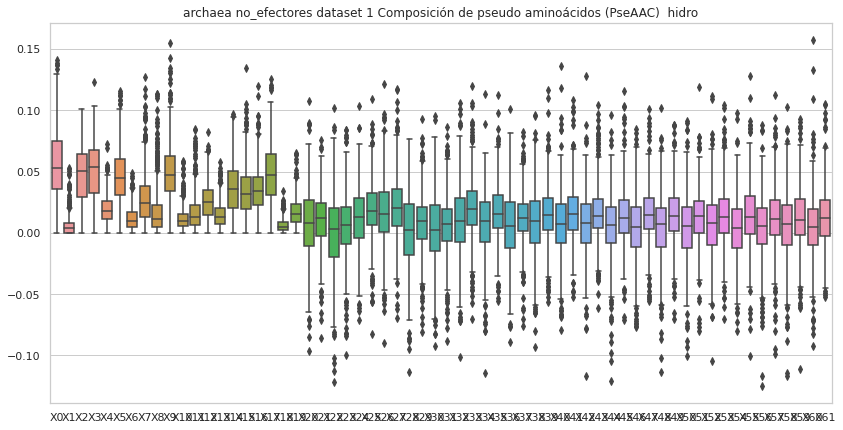

In [10]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    del df['X62']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X62'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro_mass

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores archaea dataset 1, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.014333  0.058410 -0.015800  0.050499  0.033702  0.011739  0.033106   
1    0.117089  0.022280 -0.010059 -0.055715  0.019496  0.030200  0.194636   
2   -0.022653 -0.067049  0.038619 -0.016568 -0.025107  0.036969  0.018184   
3   -0.014102 -0.186867 -0.058138  0.028357  0.017154 -0.014069 -0.006509   
4   -0.042041 -0.037866 -0.132133  0.067086 -0.011917  0.054880 -0.013365   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.068230  0.040814  0.013470 -0.024109 -0.020386  0.079698  0.291283   
496 -0.098494  0.090414 -0.046123  0.031132 -0.029106 -0.015877 -0.005387   
497  0.035241  0.074552 -0.051782  0.104516  0.053124  0.030135  0.009295   
498 -0.008424 -0.098538  0.183161 -0.018165 -0.110064  0.127099  0.025780   
499 -0.089477 -

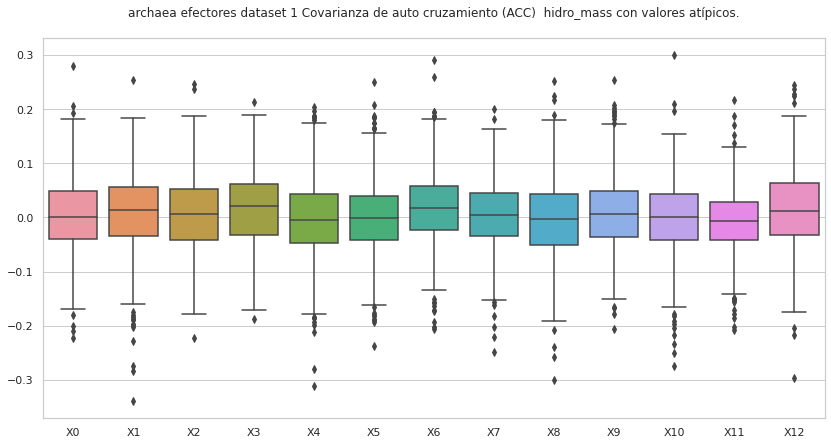

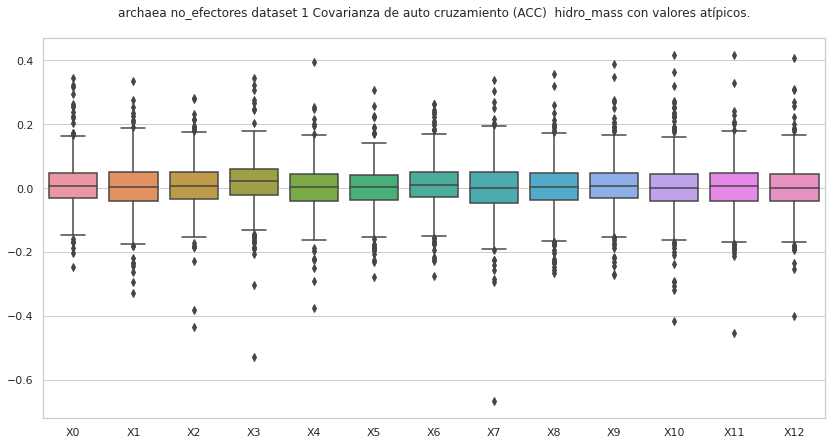

In [11]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro_mass, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores archaea dataset 1, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.014333  0.058410 -0.015800  0.050499  0.033702  0.011739  0.033106   
1    0.117089  0.022280 -0.010059 -0.055715  0.019496  0.030200  0.194636   
2   -0.022653 -0.067049  0.038619 -0.016568 -0.025107  0.036969  0.018184   
3   -0.014102 -0.186867 -0.058138  0.028357  0.017154 -0.014069 -0.006509   
4   -0.042041 -0.037866 -0.132133  0.067086 -0.011917  0.054880 -0.013365   
..        ...       ...       ...       ...       ...       ...       ...   
494 -0.078251  0.022220  0.009384 -0.016942 -0.108257 -0.109375 -0.008845   
496 -0.098494  0.090414 -0.046123  0.031132 -0.029106 -0.015877 -0.005387   
497  0.035241  0.074552 -0.051782  0.104516  0.053124  0.030135  0.009295   
498 -0.008424 -0.098538  0.183161 -0.018165 -0.110064  0.127099  0.025780   
499 -0.089477 -

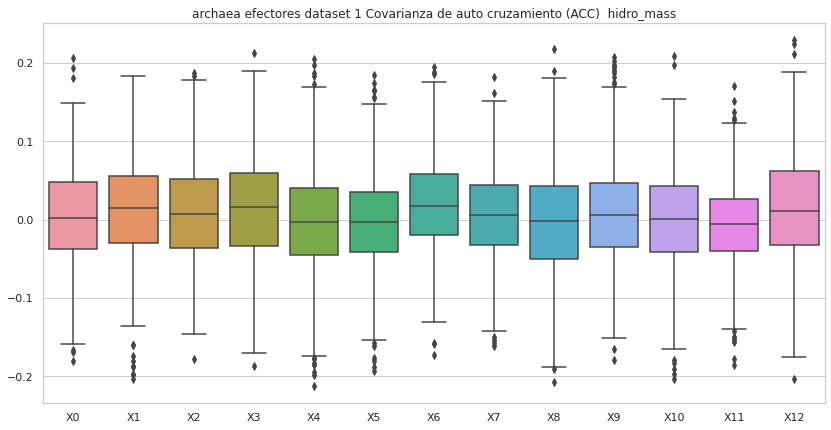

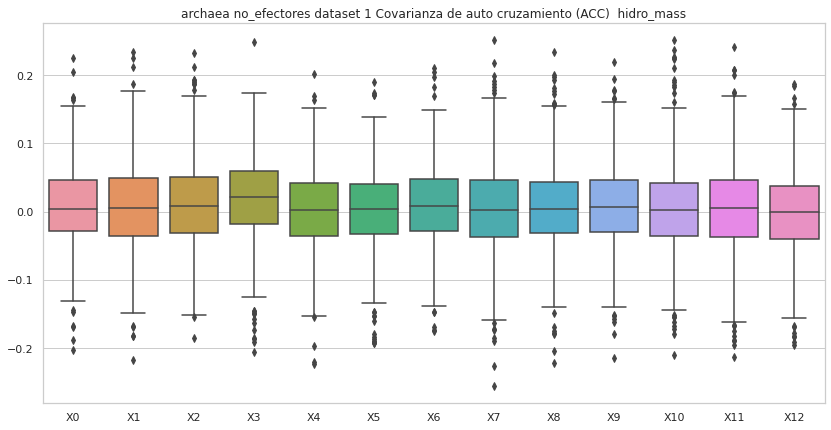

In [12]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) mass

efectores
Covarianza de auto cruzamiento (ACC)  mass efectores archaea dataset 1, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.014333  0.058410 -0.015800  0.050499  0.033702  0.011739  0.033106   
1    0.117089  0.022280 -0.010059 -0.055715  0.019496  0.030200  0.194636   
2   -0.022653 -0.067049  0.038619 -0.016568 -0.025107  0.036969  0.018184   
3   -0.014102 -0.186867 -0.058138  0.028357  0.017154 -0.014069 -0.006509   
4   -0.042041 -0.037866 -0.132133  0.067086 -0.011917  0.054880 -0.013365   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.068230  0.040814  0.013470 -0.024109 -0.020386  0.079698  0.291283   
496 -0.098494  0.090414 -0.046123  0.031132 -0.029106 -0.015877 -0.005387   
497  0.035241  0.074552 -0.051782  0.104516  0.053124  0.030135  0.009295   
498 -0.008424 -0.098538  0.183161 -0.018165 -0.110064  0.127099  0.025780   
499 -0.089477 -0.0681

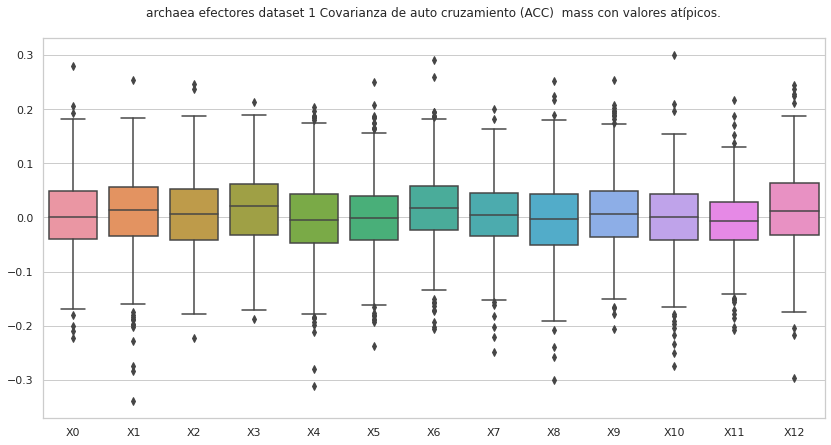

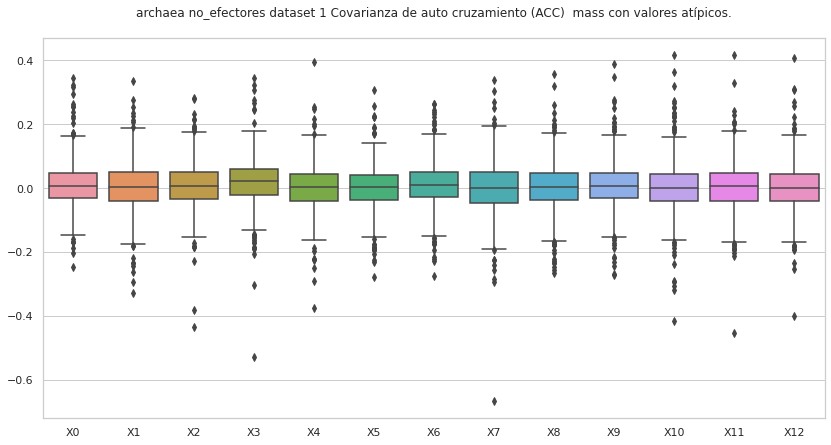

In [13]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) mass, sin valores atípicos

Covarianza de auto cruzamiento (ACC)  mass efectores archaea dataset 1, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.014333  0.058410 -0.015800  0.050499  0.033702  0.011739  0.033106   
1    0.117089  0.022280 -0.010059 -0.055715  0.019496  0.030200  0.194636   
2   -0.022653 -0.067049  0.038619 -0.016568 -0.025107  0.036969  0.018184   
3   -0.014102 -0.186867 -0.058138  0.028357  0.017154 -0.014069 -0.006509   
4   -0.042041 -0.037866 -0.132133  0.067086 -0.011917  0.054880 -0.013365   
..        ...       ...       ...       ...       ...       ...       ...   
494 -0.078251  0.022220  0.009384 -0.016942 -0.108257 -0.109375 -0.008845   
496 -0.098494  0.090414 -0.046123  0.031132 -0.029106 -0.015877 -0.005387   
497  0.035241  0.074552 -0.051782  0.104516  0.053124  0.030135  0.009295   
498 -0.008424 -0.098538  0.183161 -0.018165 -0.110064  0.127099  0.025780   
499 -0.089477 -0.068173  0.0590

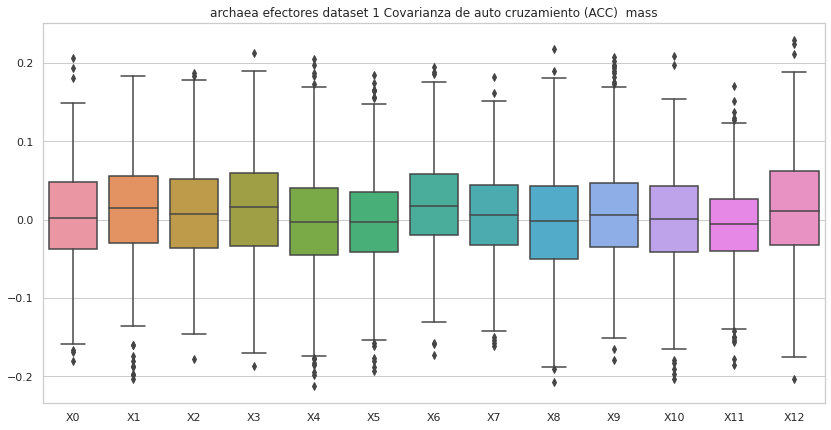

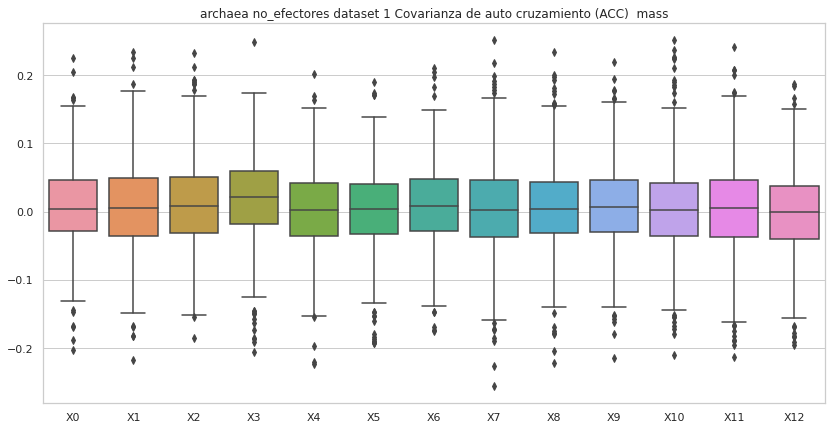

In [14]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

#Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro

efectores
Covarianza de auto cruzamiento (ACC)  hidro efectores archaea dataset 1, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.010813 -0.043708 -0.015619  0.110187  0.034273 -0.052725 -0.034041   
1    0.018466  0.035859  0.045762 -0.006163  0.020743 -0.012747  0.002079   
2    0.062457  0.023670  0.065404  0.121756 -0.002160  0.021997  0.087227   
3    0.005361 -0.143134 -0.009402 -0.083602 -0.128791 -0.025536  0.073148   
4    0.047844 -0.131639  0.153584  0.062186 -0.076578  0.063472  0.071524   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.089987 -0.114351 -0.136477  0.253919 -0.181981  0.033551 -0.120484   
496  0.110535 -0.173183  0.012241 -0.052766 -0.056464  0.039465  0.069483   
497  0.035339  0.065686  0.007001  0.034806  0.110848  0.026836  0.105358   
498  0.050122 -0.002242  0.087628  0.037271 -0.016424  0.006568  0.027550   
499 -0.045795 -0.044

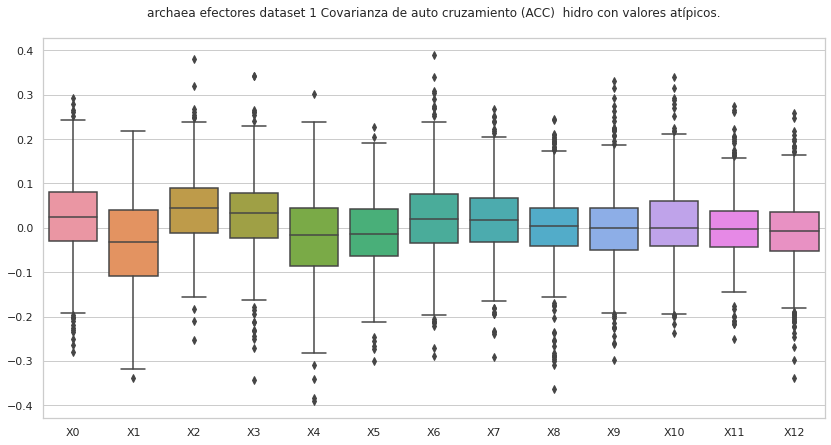

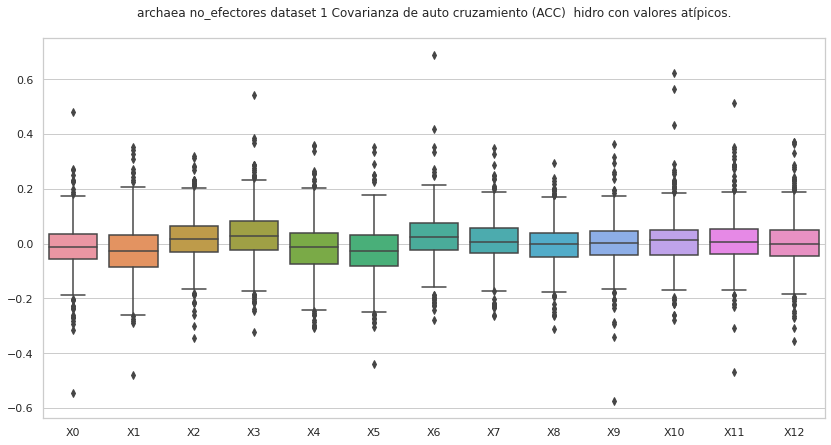

In [15]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  efectores archaea dataset 1, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.010813 -0.043708 -0.015619  0.110187  0.034273 -0.052725 -0.034041   
1    0.018466  0.035859  0.045762 -0.006163  0.020743 -0.012747  0.002079   
2    0.062457  0.023670  0.065404  0.121756 -0.002160  0.021997  0.087227   
3    0.005361 -0.143134 -0.009402 -0.083602 -0.128791 -0.025536  0.073148   
4    0.047844 -0.131639  0.153584  0.062186 -0.076578  0.063472  0.071524   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.089987 -0.114351 -0.136477  0.253919 -0.181981  0.033551 -0.120484   
496  0.110535 -0.173183  0.012241 -0.052766 -0.056464  0.039465  0.069483   
497  0.035339  0.065686  0.007001  0.034806  0.110848  0.026836  0.105358   
498  0.050122 -0.002242  0.087628  0.037271 -0.016424  0.006568  0.027550   
499 -0.045795 -0.044247  0

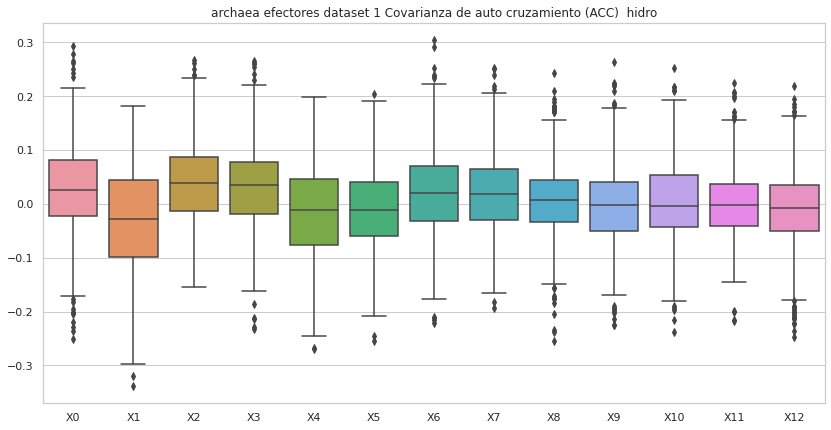

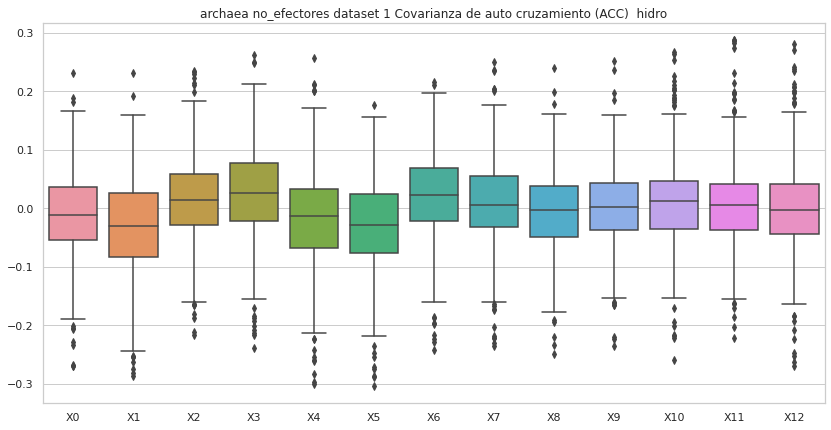

In [16]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))